In [5]:
import pandas as pd

url = "https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/pedata.html"

# Lee todas las tablas en la página
tables = pd.read_html(url)

# La primera tabla es la que queremos
df = tables[0]

print("Vista previa:")
df

# Guardar a CSV
#df.to_csv("private_equity_data.csv", index=False)


Vista previa:


,0,1,2,3,4,5,6,7,8,9
0,Industry Name,Number of firms,% of Money Losing firms (Trailing),Current PE,Trailing PE,Forward PE,Aggregate Mkt Cap/ Net Income (all firms),Aggregate Mkt Cap/ Trailing Net Income (only ...,Expected growth - next 5 years,PEG Ratio
1,Advertising,54,77.78%,514.37,291.27,73.71,46.88,34.73,22.98%,1.51
2,Aerospace/Defense,67,43.28%,39.16,87.42,35.07,37.85,28.52,19.02%,1.50
3,Air Transport,24,70.83%,28.72,17.98,12.44,19.62,11.47,35.25%,0.33
4,Apparel,37,62.16%,18.53,28.05,21.85,33.28,17.67,5.95%,2.97
...,...,...,...,...,...,...,...,...,...,...
92,Trucking,24,37.50%,75.05,335.52,47.60,29.53,29.87,12.03%,2.48
93,Utility (General),14,0.00%,19.19,18.72,17.73,18.66,19.19,6.90%,2.78
94,Utility (Water),15,33.33%,27.07,23.13,22.24,25.32,21.57,14.10%,1.53
95,Total Market,6062,57.51%,57.11,48.86,31.60,32.70,25.93,14.70%,1.76


In [6]:
df_damodaran = df.copy()
df_damodaran.columns=[
    'Industry_Name', 
    'Number_of_Firms', 
    'Percentage_Money_Losing_Firms', 
    'Current_PE', 
    'Trailing_PE', 
    'Forward_PE', 
    'Aggregate_MktCap_NetIncome_AllFirms', 
    'Aggregate_MktCap_TrailingNetIncome_MoneyMakingFirms', 
    'Expected_Growth_Next_5_Years', 
    'PEG_Ratio'
]

# Verificar los nuevos nombres de las columnas
print(df_damodaran.columns)



Index(['Industry_Name', 'Number_of_Firms', 'Percentage_Money_Losing_Firms',
       'Current_PE', 'Trailing_PE', 'Forward_PE',
       'Aggregate_MktCap_NetIncome_AllFirms',
       'Aggregate_MktCap_TrailingNetIncome_MoneyMakingFirms',
       'Expected_Growth_Next_5_Years', 'PEG_Ratio'],
      dtype='object')


In [8]:
df_damodaran['Industry_Name'].unique()

array(['Industry  Name', 'Advertising', 'Aerospace/Defense',
       'Air Transport', 'Apparel', 'Auto &  Truck', 'Auto Parts',
       'Bank (Money  Center)', 'Banks (Regional)',
       'Beverage  (Alcoholic)', 'Beverage (Soft)', 'Broadcasting',
       'Brokerage & Investment Banking', 'Building  Materials',
       'Business & Consumer Services', 'Cable TV', 'Chemical (Basic)',
       'Chemical  (Diversified)', 'Chemical (Specialty)',
       'Coal &  Related Energy', 'Computer Services',
       'Computers/Peripherals', 'Construction Supplies', 'Diversified',
       'Drugs (Biotechnology)', 'Drugs  (Pharmaceutical)', 'Education',
       'Electrical  Equipment', 'Electronics (Consumer & Office)',
       'Electronics  (General)', 'Engineering/Construction',
       'Entertainment', 'Environmental & Waste Services',
       'Farming/Agriculture', 'Financial Svcs. (Non-bank & Insurance)',
       'Food Processing', 'Food Wholesalers', 'Furn/Home  Furnishings',
       'Green & Renewable Energy',

In [9]:
# Filtrar las filas donde 'Industry_Name' contiene "oil and gas"
oil_and_gas_df = df_damodaran[df_damodaran['Industry_Name'].str.contains('Oil/Gas', case=False, na=False)]

# Mostrar la tabla filtrada
oil_and_gas_df

,Industry_Name,Number_of_Firms,Percentage_Money_Losing_Firms,Current_PE,Trailing_PE,Forward_PE,Aggregate_MktCap_NetIncome_AllFirms,Aggregate_MktCap_TrailingNetIncome_MoneyMakingFirms,Expected_Growth_Next_5_Years,PEG_Ratio
54,Oil/Gas (Integrated),4,0.00%,9.09,10.83,14.75,12.51,14.21,3.42%,4.15
55,Oil/Gas (Production and Exploration),147,53.74%,125.94,19.10,15.19,10.19,11.90,7.00%,1.70
56,Oil/Gas Distribution,24,33.33%,66.62,27.82,22.96,14.17,19.80,1.24%,16.00


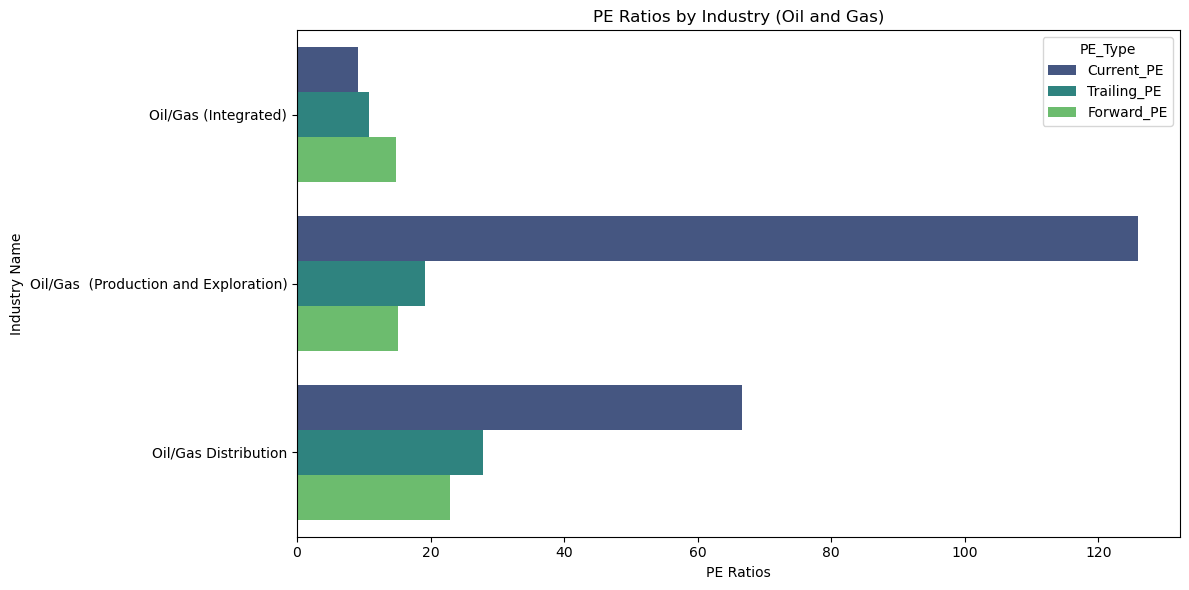

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las filas donde 'Industry_Name' contiene "Oil or Gas"
oil_and_gas_df = df_damodaran[df_damodaran['Industry_Name'].str.contains('Oil/Gas', case=False, na=False)]

# Seleccionar las columnas necesarias y convertir a numérico
oil_and_gas_pe = oil_and_gas_df[['Industry_Name', 'Current_PE', 'Trailing_PE', 'Forward_PE']].copy()
oil_and_gas_pe[['Current_PE', 'Trailing_PE', 'Forward_PE']] = oil_and_gas_pe[['Current_PE', 'Trailing_PE', 'Forward_PE']].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores faltantes
oil_and_gas_pe = oil_and_gas_pe.dropna()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Gráfico de barras horizontales con Seaborn
sns.barplot(
    data=oil_and_gas_pe.melt(id_vars='Industry_Name', var_name='PE_Type', value_name='PE_Value'),
    x='PE_Value', y='Industry_Name', hue='PE_Type', palette='viridis'
)

# Configurar título y etiquetas
plt.title('PE Ratios by Industry (Oil and Gas)')
plt.xlabel('PE Ratios')
plt.ylabel('Industry Name')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()